## Der "Moderne Dreisatz" - eine einfach(st)e _'lineare Regression'_

Das kennen wir doch noch aus der Schule: wenn 7 Äpfel 2,50€ kosten, was kosten dann 5 Äpfel (unter der (Neben-)bedingung, dass wir für keinen Apfel auch nichts bezahlen müssen, d.h. 0 Äpfel kosten 0€  😀)?

Natürlich können wir mit etwas Mathematikkenntnissen diesen 3-Satz ganz einfach lösen:$$ gesuchterPreis=\frac{2,5}{7}*5+0 $$

Da es hier aber um das _maschinelle Lernen_ geht, stellen wir uns mal dumm denn wir wollen doch einmal prüfen, ob ein Programm so etwas nicht auch selber lernen kann: was kosten die Äpfel, wenn 0 Äpfel nichts und 7 Äpfel 2,50€ kosten? Wenn das Programm das gelernt hat, dann müssten wir es auch einfach nach dem Preis der gesuchten Menge fragen können, oder?. 

***Wir müssen nur wissen, dass wir hier eine _lineare Regressionsaufgabe_ zu lösen haben.***

Die [lineare Regression](https://de.wikipedia.org/wiki/Lineare_Einfachregression) ist eine Methode des [überwachten Lernens](https://de.wikipedia.org/wiki/%C3%9Cberwachtes_Lernen) (supervised-learning), d.h. es werden klassifizierte Daten benötigt. Wir müssen daher immer Beispiele haben, bei denen wir den Zusammenhang zwischen 2 (oder mehr) Werten kennen - so wie wir den Preis für 0 und den Preis für 7 Äpfel kennen. Für uns unbekannte Werte können wir dann den Zusammenhang durch die Methode bestimmen.

*Die Beispiele sind sicher keine realen Anwendungen für die man ML einsetzen wird. Ich möchte nur anhand dieser ganz einfachen Beispiele zeigen, wie die Methoden, welche beim ML eingesetzt werden, funktionieren. Ich denke sie sind so einfach, dass man die Vorgehensweise recht leicht nachvollziehen kann. Das soll das Ziel sein.*

__Hinweise:__ 
 1. ich benutze `sklearn` als Bibliothek für die Modelle. Es gibt auch andere Bibliotheken (bspw. `scipy`, die ebenfalls Methoden zur linearen Regressionen implemetieren 
 1. bei einigen Zellen habe ich <code>%%capture --no-display</code> vorangestellt. Das Statement unterdrückt verschiedene Warnungen, die hier nicht weiter interesieren (nur den Entwickler). In der online-Version bei [Jupyter.org](https://jupyter.org/try) unterscheiden sich die Ausgabe bei den klassischen Notebooks und bei dem neueren JupyterLab. Im JupyterLab würde die Warnungen angezeigt werden, welche dadurch unterdrückt werden. 
 2. Ich nutze `plt.show()` zum Anzeigen der Grafiken, obwohl das im Notebook durch `%matplotlib inline` nicht nötig wäre. Das liegt daran, dass der python-Code so auch direkt in einer IDE ausgeführt werden kann und dann ebenfalls alle Grafiken angezeigt werden. Es erspart mir den python-Code immer anzupassen, da ich selber nur im Notebook entwickel

__Achtung:__ die folgende Zelle muss nur in der [Trial-Version von JupyterLab](https://jupyter.org/try-jupyter/lab) ausgeführt werden, da sonst die erforderliche Scikit-Learn Bibliothek nicht installiert ist. Die Installation ist abgeschlossen, wenn der Kreis oben rechts wieder weiß ist. Während der Ausführung ist er schwarz. Die Installation kann in der online Umgebung ein oder zwei Minuten dauern.

In [ ]:
# code snippet below from @lrowe: https://github.com/jtpio/jupyterlite/issues/110#issuecomment-850916083
import micropip
await micropip.install("scikit-learn")

In [1]:
%%capture --no-display  
import sklearn.linear_model as lm

Gleich trainieren wir das Modell mit den bekannten Preisen und Mengen (0 Äpfel kosten 0€ und 7 Äpfel kosten 2,50€)

Das Modell wird uns später ein paar interessante Werte liefern (und hoffentlich auch den gesuchten Preis):
- die Parameter $w$ und $a$ für die lineare Funktion $f(x)=a+wx$ welche in dem Modell die Gerade darstellt, auf der die gesuchten Preise für die Stückzahlen abzulesen sind
- der Score ist eine Bewertung, wie genau die Vorhersage für die unbekannten Werte sein wird. Er bemisst sich daran, wie weit die bekannten Werte von der gefundenen bzw. erlernten Geraden abweichen. Da diese bei dem Beispiel durch genau 2 Punkte verläuft muss dieser Score im Beispiel 1.0 (oder 100%) sein. 

__Das kompakteste Coding, welches mir dazu in den Sinn kam sind die beiden beiden Zeilen in der nächsten auszuführenden Zelle:__
es ist kompakt, aber nicht sehr "Entwicklerfreundlich". In dem Beispiel danach werde ich versuchen, das Coding näher zu erläutern.

Aber: es werden tatsächlich nur 2 Methoden der Klasse `LinearRegression` verwendet: 
+ `fit` dient dabei zum Erlernen der Zusammenhänge. Daher werden immer die Werte und die zugeordneten Klassen übergeben. Hier die Anzahl der Äpfel und die zugehörigen Preise 
+ `predict` dient dazu neue Werte anhand der gelerneten Parameter des Modells neue (unbekannte) Werte vorherzusagen. Dieser Methode braucht daher nur der gesuchte/vorherzusagende Wert übergeben zu werden 

Beinahe alle Klassen, die für MachineLearning verwendet werden implementieren diese beiden Methoden.

In [2]:
lr = lm.LinearRegression().fit([[0],[ 7 ] ],   #Anzahl Äpfel 0 und 7
                               [[0],[2.5]])    #die Preise für die Äpfel 0 für und 2,50 für 7
print(f'Die 5 Äpfel kosten {lr.predict([[5]])[0][0]:.2f}€')

Die 5 Äpfel kosten 1.79€


Immer hilfreich ist eine graphischen Darstellung:
die Gerade ist die Linie durch die bekannten Punkte ((0,0) und (7,2.5)) aus denen das Modell "gelernt" hat. Auf dieser Geraden können wir jetzt alle gesuchten Preise ablesen - oder das Modell nach den Preisen fragen.

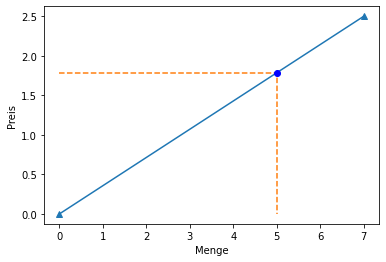

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline

p = lr.predict([[5]])[0][0]  #mit der Variablen p ist die Syntax unten etwas einfacher
plt.plot([[0],[7]],[[0],[2.5]],'-^') 
plt.xlabel('Menge')
plt.ylabel('Preis')
plt.plot([[0],[5],[5]],[[p],[p],[0]],linestyle='--')
plt.plot(5,p, 'ob')
plt.show()

Das trainierte Modell gibt uns auch die erlernten Werte für die "Geradengleichung" $a+wx$ aus sowie den Score, der bei einer Linie welche durch genau 2 Punkte geht nur 1.0 sein kann:

In [4]:
w = lr.coef_[0][0]
a = lr.intercept_[0]
print(f'a={a:.1f} w={w:.4f}')
print(f'Score: {lr.score([[0],[7] ],[[0],[2.5]]):.4f}')

a=-0.0 w=0.3571
Score: 1.0000


Wir könnten mit den erlernten Parametern $w$ und $a$ die Preise auch selber berechnen - aber warum sollten wir das tun, wenn die predict-Methode der Klasse das für uns auch so tut? \
Nee, selbstverständlich sind die Werte interessant: nämlich dann wenn wir das, was hier erlernt wurde ein einem anderen Programm verwenden wollen, in dem die hier verwendeten Klassen nicht bekannt sind.

### Jetzt aber mal mit etwas besser zu verstehendem und wiederverwendbarem Coding

Also ein neues Modell: 

ein Auto verbraucht 17,6kWh auf 100km. Während wir vormittags Arbeiten können wir das Auto an einer normalen Haushalts-Steckdose in der Tiefgarage am Büro aufladen. Wie weit kommt es mit den 12kWh Strom, die - während wir arbeiten - nachgeladen werden können?

* Im `X`-Vektor haben wir den Verbauch und im `y`-Vektor die Reichweiten
* in `M` tragen wir die Menge nachgeladenen Stroms ein für die wir die Reichweite wissen möchten

In [5]:
import numpy as np    # machen wir es einfacher und nutzen numpy :)
X = np.array([[0,17.6]]).reshape(-1,1)
y = np.array([0,100])
M = 12.0
print(X)

[[ 0. ]
 [17.6]]


Wir können die Werte des X-Vektors nicht direkt an die `fit`-Methode übergeben, da die Methode mehrdimensionale Arrays verarbeitet. Daher haben wir oben eine Formatkonvertierung durchführen müssen und haben den Vektor mit den beiden Elementen [0,17.6] in eine Matrix mit einer Zeile und 2 Werten konvertiert. *(bei python ist die korrekte Klammerung mit [] und () elementar - da muss ich oftmals selber noch herumprobieren...)*
Wir geben direkt den Score aus, da uns dieser einen Anhaltspunkt darüber gibt, wie gut die Vorhersage über die Gerade zu diesen Werten sein kann. \
Wie oben schon beschrieben, trainieren wir das Modell mit der`fit`-Methode. Dieser Methode werden die bekannten X,y Werte übergeben:

In [6]:
lr = lm.LinearRegression() # wir erstellen ein LinearRegression Modell aus sklearn.linear_model
lr.fit(X,y)
w = lr.coef_[0]
a = lr.intercept_
print(f'Score: {lr.score(X,y):.4f}')
print(f'w={w:.4f} a={a:.1f}')

Score: 1.0000
w=5.6818 a=0.0


Da unser Modell wieder anhand von genau 2 (X,y)-Wertpaaren gelernt hat ist der Score wieder 1.0, denn unsere gesuchte Funktion (Gerade) läuft zwangsläufig genau durch diese beiden Punkte. 

Im nächsten Schritt wenden wir die `predict`-Methode an, welche  die Vorhersage aufgrund der erlernten Werte trifft. Ihr wird nur noch der gesuchte Wert `M` übergeben:

In [7]:
pr = lr.predict([[M]])
print(f'Mit den {M} geladenen kWh haben wir zusätzlich {pr[0]:.0f}km Reichweite')

Mit den 12.0 geladenen kWh haben wir zusätzlich 68km Reichweite


Zum Überprüfen unseres Ergebnisses zeigen wir uns die Werte in einer Grafik an:

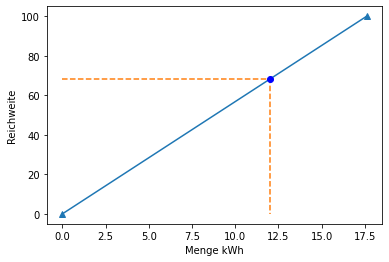

In [8]:
%%capture --no-display
p=pr[0]
plt.plot(X,y,'-^') 
plt.xlabel('Menge kWh')
plt.ylabel('Reichweite')
plt.plot([X[0],M,M],[[p],[p],[0]],linestyle='--')
plt.plot(M,p, 'ob')
plt.show()

### noch ein Beispiel aber mit mehr _beobachteten_ Werten
In einem Handbuch habe ich eine Liste mit korrespondierenden Temperaturangaben in °F und °C gefunden. Das Modell soll lernen, wie die Umrechnung von °C nach °F funktioniert. Wie erwartet, liegen die Werte nicht mehr so ideal auf einer Geraden. (Sonst hätte ich ein anderes Beispiel suchen müssen). Jetzt haben wir es schon eher mit einer "echten" Regressionsanalyse zu tun: wir suchen die Linie, welche an allen beobachteten Punkten am nächsten verläuft. D.h. wir suchen eine Gerade, bei der die (absolute) Summe der Abstände der beobachteten Werte zu dieser Geraden minimal ist.

Zunächst einmal müssen wir aber prüfen, ob unsere Vermutung, dass die Werte auf einer Geraden legen, überhaupt zutrifft.  Um das zu klären hilft wieder eine Graphik mit den Werten:

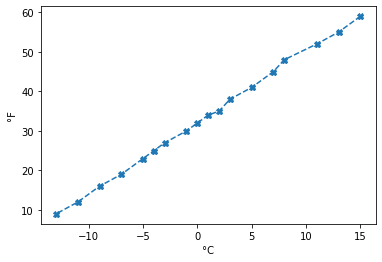

In [9]:
C = np.array([[15,13,11, 8, 7, 5, 3, 2, 1, 0,-1,-3,-4,-5,-7,-9,-11,-13]]).reshape(-1,1)  #Celsius
f = np.array( [59,55,52,48,45,41,38,35,34,32,30,27,25,23,19,16, 12,  9])    #Fahrenheit"
plt.ylabel('°F')
plt.xlabel('°C')
plt.plot(C,f,'X--') 
plt.show()

Das sieht doch einigermaßen nach einer Geraden aus, so dass wir einen solchen Zusammenhang wie oben unterstellen können.

Ich nenne jetzt die Variable mit den gesuchten Werten `C` und die der gegebenen Werte `f`.

Wieder ist es die `fit`-Methode, mit der das Modell aus aus den Daten "lernt". Da die Werte nicht mehr exakt auf einer Geraden liegen, wird der ermittelte Score jetzt kleiner als 1.0 sein.

In [10]:
lr.fit(C,f)
c=lr.coef_[0]
i=lr.intercept_
print(f'Score: {lr.score(C,f):.4f}')
print(f'w={c:.4f} a={i:.1f}')

Score: 0.9989
w=1.8071 a=32.1


Mit den gerade ermittelten Werten $w=1.8071$ und $a=32.1$ hat das Modell jetzt den linearen Zusammenhang zwischen °C und °F erlernt. \
Jetzt wird noch für jeden °C Wert der anhand der erlernten Formel die Temperatur in °F "vorhergesagt" und die Werte mit einer Geraden verbunden.

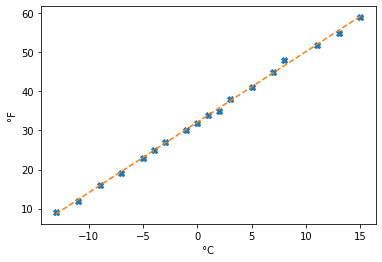

In [11]:
pred = lr.predict(C)
plt.ylabel('°F')
plt.xlabel('°C')
plt.plot(C,f,'X')
plt.plot(C,pred,'--')
plt.show()

> Die "offizielle" Formel ist:<br>
*(0 °C * 9/5) + 32 = 32 °F*<br>
9/5 sind 1,8 und ist beinahe gleich unseren erlernten 1,8071 und die zu addierenden 32 sind beinahe gleich unseren erlernten 32,1

### Zum Schluss haben wir eine komplexere Funktion
Wir haben die Ladekurve unseres Autos beobachtet und sehen das typische Verhalten, dass bei geringem Ladestand (State-of-charge) die Ladeleistung schnell sehr hoch ist und dann abfällt. Wir wollen jetzt ein Modell erstellen, welches uns die Ladeleistung bei einem bestimmten Ladestand bestimmt. Im Gegensatz zu den Modellen oben haben wir jetzt **keine** Funktion der Form $y=a+wx$ mehr (also eine Gerade). Stattdessen muss unser Modell jetzt eine Polynomfunktion n-ten Grades erlernen

$$f(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{2}x^{2}+a_{1}x+a_{0} $$

***Hinweis:*** diese (fiktive) Ladekurve ist typisch für das Laden an DC-Ladepunkten (Schnellladesäulen, an denen mit Gleichstrom geladen wird). Die Ladeleistung bei der im 2. Beispiel oben beschriebenen Haushaltssteckdose ist ein AC- oder Wechselstromladepunkt mit etwa 3kW maximaler Leistung. Dieser Unterschied ist an den meisten Stammtischen nicht bekannt und daher wird dort nicht verstanden, dass man die im Beispiel oben erzielte Reichweite nach 4 Stunden Ladezeit aber auch innerhalb von 5 Minuten erreichen kann! Beide Berechnungen sind korrekt.

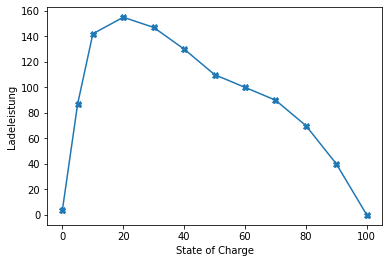

In [12]:
X = np.array([0, 5,  10,  20,  30,  40,  50,  60,  70, 80, 90, 100]).reshape((-1,1))
y = np.array([4, 87, 142, 155, 147, 130, 110, 100, 90, 70, 40, 0])

plt.xlabel('State of Charge')
plt.ylabel('Ladeleistung')
plt.plot(X,y,'X-')
plt.show()

Wir sehen durch die Darstellung der erfassten Werte, dass wir keinen einfachen linearen Zusammenhang wie bei den Beispiel oben mehr haben. Das wird uns auch bestätigt, wenn wir das Modell von oben verwenden und uns den Score ansehen. Dieser ist sehr gering, weil die (absolute) Summe der Abstände der Punkte zu der Geraden sehr hoch ist:

In [13]:
lr.fit(X,y)
lr.score(X,y)

0.16855131415117663

Wir brauchen also ein anderes Regressionsmodell, welches Polynomfunktionen erlernen kann. In `sklearn` benötigen wir dazu die Methode `PolynomialFeatures` aus der Klasse `sklearn.preprocessing`, die irgendwie mit dem angegebenem Grad der Funktion irgendetwas "lernen". <mark>Falls jemand von euch versteht, was es mathematisch damit auf sich hat, erklärt es mir bitte. `X` und `x_` unterscheiden sich deutlich und "gelernt" wird mit `x_` anstelle von `X`.</mark>

Wir probieren einfach mal verschiedene Polynomfunktionen der Grade N=1,..,11 und lassen uns die Funktion darstellen und den jeweilgen Score ausgeben:

Score bei N=1: 0.16855131415117675
Score bei N=2: 0.7119629660950693
Score bei N=3: 0.8346152415510826
Score bei N=5: 0.9958080591286104
Score bei N=6: 0.9970408791381876
Score bei N=7: 0.9974712710100814
Score bei N=8: 0.9596239263759018
Score bei N=9: 0.8272976361068007
Score bei N=11: 0.5471049351497606


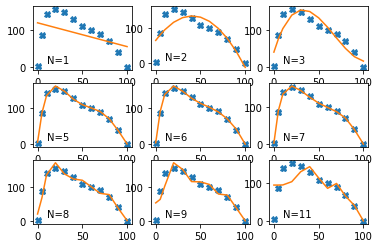

In [14]:
from sklearn.preprocessing import PolynomialFeatures

pl=1
for N in (1,2,3,5,6,7,8,9,11):   # max 9 Werte, da wir 3x3 Bilder (subplots) unten verwenden
    transformer = PolynomialFeatures(degree=N)
    transformer.fit(X)
    x_ = transformer.transform(X)
    lr.fit(x_,y)
    pred = lr.predict(x_)
    plt.subplot(3, 3, pl)        #3x3=9 subplots
    plt.text(10,10,f'N={N}')
    plt.plot(X,y,'X')
    plt.plot(X,pred)
    print(f'Score bei N={N}: {lr.score(x_,y)}')
    pl+=1
plt.show()

Den höchsten Score haben wir bei N=7 und die Kurve verläuft auch recht gut entlag der beobachteten Werte. Ob N=5, N=6 oder N=7 gewählt wird macht dabei in dem betrachteten Intervall kaum keinen Unterschied.

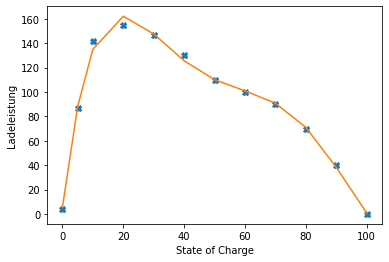

Score bei N=5: 0.9958080591286104


In [36]:
N=5
transformer = PolynomialFeatures(degree=N)
transformer.fit(X)
x_ = transformer.transform(X)
lr.fit(x_,y)
pred = lr.predict(x_)
plt.xlabel('State of Charge')
plt.ylabel('Ladeleistung')
plt.plot(X,y,'X')
plt.plot(X,pred)
plt.show()
print(f'Score bei N={N}:',lr.score(x_,y))

In [37]:
SOC = 67
soc = np.array([SOC])
p_ = transformer.transform(soc.reshape((-1,1)))
pr0 = lr.predict(p_)

In [38]:
pr = pr0[0]
print(f'Bei einem SoC von {SOC}% haben wir ein Ladeleistung von etwa {pr:.0f}kW')

Bei einem SoC von 67% haben wir ein Ladeleistung von etwa 94kW


Und zum Überprüfen stellen wir das Ergebnis auch noch einmal in einer Graphik dar:

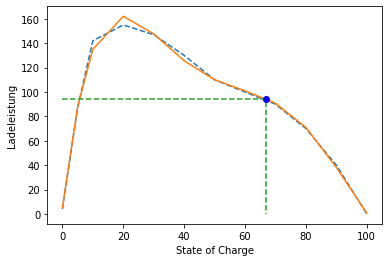

In [39]:
%%capture --no-display

plt.xlabel('State of Charge')
plt.ylabel('Ladeleistung')
plt.plot(X,y,linestyle='--')
plt.plot(X,pred)
plt.plot([X[0],soc,soc],[[pr0],[pr0],[0]],linestyle='--')
plt.plot(soc,pr0, 'ob')
plt.show()

Und schliesslich sind das die Parameter der erlernten Polynomfunktion: auch mithilfe dieser Werte könnte man die Leistung errechnen:

In [40]:
print(lr.coef_,'\n', lr.intercept_)

[ 0.00000000e+00  2.09227266e+01 -9.66204434e-01  1.86858689e-02
 -1.64501595e-04  5.32943975e-07] 
 5.281508890636658


Diese Routine nimmt jeden Wert von `lr.coef_` multipliziert ihn mit dem gesuchten Wert welcher zuvor mit dem Index von `lr.coef_` potenziert wurde und addiert zu dieser Summe dann noch den Wert von `lr.intercept_`:

In [42]:
W=SOC
i = 0
s = lr.intercept_
for j in (lr.coef_):
    print(f'{j:.3f} * {W} hoch {i} = {(W**i*j):.3f}')
    s = s + (W**i*j)
    i+=1

print(s)

0.000 * 67 hoch 0 = 0.000
20.923 * 67 hoch 1 = 1401.823
-0.966 * 67 hoch 2 = -4337.292
0.019 * 67 hoch 3 = 5620.018
-0.000 * 67 hoch 4 = -3314.892
0.000 * 67 hoch 5 = 719.541
94.47998723691853
